Do problems 1,
2, 3, 5, 6 from Numerical Differentiation lab.

In [32]:
import sympy as sy
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize

(-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))


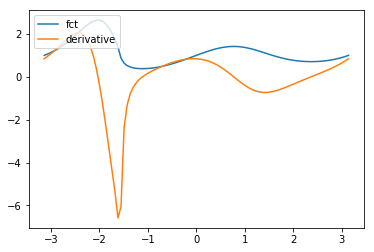

In [25]:
x = sy.symbols('x')
der=sy.diff((sy.sin(x)+1)**(sy.sin(sy.cos(x))), x)
print(der)
fct1=sy.lambdify(x,(sy.sin(x)+1)**(sy.sin(sy.cos(x))))
der_fct1=sy.lambdify(x,sy.diff((sy.sin(x)+1)**(sy.sin(sy.cos(x))), x))
i=np.linspace(-np.pi, np.pi,100)
plotfct1=fct1(i)
plotder_fct1=der_fct1(i)
plt.plot(i,plotfct1, label="fct")
plt.plot(i,plotder_fct1, label="derivative")
plt.legend(loc="upper left")

# Problem 2

In [38]:
def fw2(f,x0,h):
    diffquot=(f(x0+h)-f(x0))/h
    return diffquot

In [39]:
def fw3(f,x0,h):
    diffquot=(-3*f(x0)+4*f(x0+h)-f(x0+2*h))/(2*h)
    return diffquot

In [40]:
def bw2(f,x0,h):
    diffquot=(f(x0)-f(x0-h))/h
    return diffquot

In [41]:
def bw3(f,x0,h):
    diffquot=(3*f(x0)-4*f(x0-h)+f(x0-2*h))/(2*h)
    return diffquot

In [118]:
def ctr2(f,x0,h):
    diffquot=(f(x0+h)-f(x0-h))/(2*h)
    return diffquot

In [119]:
def ctr4(f,x0,h):
    diffquot=(f(x0-2*h)-8*f(x0-h)+8*f(x0+h)-f(x0+2*h))/(12*h)
    return diffquot

In [120]:
def f(x):
    out=(np.sin(x)+1)**np.sin(np.cos(x))
    return out

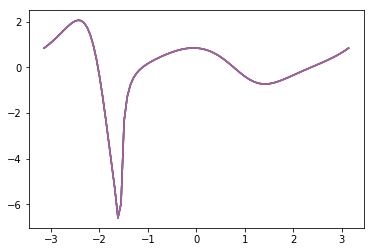

In [121]:
i=np.linspace(-np.pi, np.pi,100)
h=0.001
plotfct1=fw2(f,i,h)
plotfct2=fw3(f,i,h)
plotfct3=bw2(f,i,h)
plotfct4=bw3(f,i,h)
plotfct5=ctr2(f,i,h)
plotfct6=ctr4(f,i,h)

for j in range(1,6):  
    plt.plot(i,plotfct1)

They look the same as in the previous question. 

# Problem 3

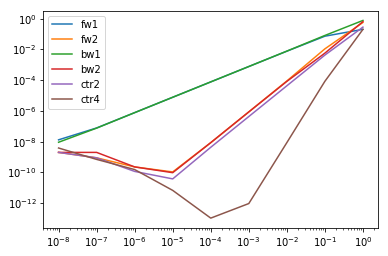

In [122]:
truth=der_fct1(1)
h=np.logspace(-8, 0,9)
res1=abs(fw2(f,1,h)-truth)
plt.plot(h,res1, label="fw1")
res2=abs(fw3(f,1,h)-truth)
plt.plot(h,res2,label="fw2")
res3=abs(bw2(f,1,h)-truth)
plt.plot(h,res3,label="bw1")
res4=abs(bw3(f,1,h)-truth)
plt.plot(h,res4,label="bw2")
res5=abs(ctr2(f,1,h)-truth)
plt.plot(h,res5, label="ctr2")
res6=abs(ctr4(f,1,h)-truth)
plt.plot(h,res6, label="ctr4")
plt.legend(loc="upper left")
plt.xscale('log')
plt.yscale('log')

# Problem 5


In [71]:
def jacob(f,x0,h):
    e=np.eye(len(x0))
    jac=np.empty([2, len(x0)])
    x0=np.array(x0)
    for i in range(0,len(x0),1):
        a=f(x0+h*e[:,i])
        b=f(x0-h*e[:,i])
        jac[:,i]=(a-b)/(2*h)
    #return jac1 
    return jac

In [72]:
def f(x):
    out=np.array([x[0]**2,x[0]**3-x[1]])
    return out

In [73]:
c=np.array([2,3])

In [74]:
jacob(f,c,0.001)

array([[ 4.      ,  0.      ],
       [12.000001, -1.      ]])

In [187]:
x,y=sy.symbols('x,y')
z=sy.Matrix([x**2,x**3-y])
k=z.jacobian([x,y])
check=sy.lambdify([x,y],k)
check(2,3)

array([[ 4,  0],
       [12, -1]])

# Problem 6

In [99]:
pip install autograd

  Stored in directory: C:\Users\utabo\AppData\Local\pip\Cache\wheels\72\6f\c2\40f130cca2c91f31d354bf72de282922479c09ce0b7853c4c5
Successfully built autograd
Note: you may need to restart the kernel to use updated packages.


In [25]:
from autograd import numpy as anp
from autograd import grad
from autograd import elementwise_grad

In [6]:
def t(x,n):
    if n==0:
        return anp.ones_like(x)
    elif n==1:
        return x
    else:
        return 2*x*t(x,n-1)-t(x,n-2)
    return out

In [11]:
grid=anp.linspace(-1,1,100)


In [12]:
cheb_der = elementwise_grad(t)

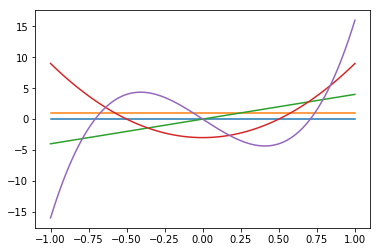

In [13]:
for n in range(5):
    plt.plot(grid, cheb_der(grid,n))

# Newton Methods


In [14]:
# 1, 3, 4, and 7

In [80]:
def t(n,x):
    t=np.empty((n,len(x)))
    t[0,:]=np.ones((1,len(x)))
    t[1,:]=x      
    t[k,:]=2*x*t[k-1,:]-t[k-2,:]    

## Problem 1

In [245]:
def Newton(f, x0, der,tol, maxiter):
    x_old=x0
    for it in range(maxiter):
        x_new=x_old-(f(x_old)/der(x_old))
        if abs(x_old-x_new)<tol:
            print('converged - yay!')     
            break 
        x_old=x_new
        print("Iteration:",it+1)  
    return x_new

In [238]:
def f(x):
    out=anp.exp(x)-2
    return out

In [239]:
derf=elementwise_grad(f)

In [240]:
# derf(anp.float(0)) Note: if using autograd, convert zeros to float

In [241]:
truth=scipy.optimize.newton(f,0.01)

In [242]:
 Newton(f, 0.01, derf,10**(-3), 10)

NameError: name 'printiter' is not defined

# Problem 3

In [181]:
def Newtonbt(f, x0, der,tol, maxiter, *alpha):
    if not alpha:
        alpha=1
    else:
        alpha=np.array(*alpha)
    x_old=x0
    for it in range(maxiter):
        x_new=x_old-alpha*(f(x_old)/der(x_old))
        if abs(x_old-x_new)<tol:
            print('converged - yay!')     
            break 
        x_old=x_new     
        #print("Iteration:",it+1)  
    return x_new

In [182]:
tol=10**(-4)
maxiter=20

In [209]:
 Newtonbt(f, 0.01, derf,tol, maxiter,0.3)
    

converged - yay!


1.0000000000000094e-05

In [210]:
f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)

In [211]:
derf=elementwise_grad(f)

In [212]:
 Newtonbt(f, 0.01, derf,tol, maxiter,0.4)

converged - yay!


1.5999999999999915e-05

In [208]:
 Newtonbt(f, 0.01, derf,tol, maxiter,1)

10485.760000000064

## Problem 4:

In [224]:
alphagrid=np.linspace(0.3,0.4,30)
#Newtonbt(f, 0.01, derf,tol, maxiter,alphagrid) I think I cannot do this as pyhon gets confused about the abs criterion. 
# do loop instead
#plt.plot(grid, Newtonbt(f, 0.01, derf,tol, maxiter,alpha))

In [227]:
y=np.empty([len(alphagrid),1])
i=0
for alpha in alphagrid:     
    y[i,0]=abs(Newtonbt(f, 0.01, derf,tol, maxiter,alpha))
    i=i+1

converged - yay!
converged - yay!
converged - yay!
converged - yay!
converged - yay!
converged - yay!
converged - yay!
converged - yay!
converged - yay!
converged - yay!
converged - yay!
converged - yay!
converged - yay!
converged - yay!
converged - yay!
converged - yay!
converged - yay!
converged - yay!
converged - yay!
converged - yay!
converged - yay!
converged - yay!
converged - yay!
converged - yay!
converged - yay!
converged - yay!
converged - yay!
converged - yay!
converged - yay!
converged - yay!


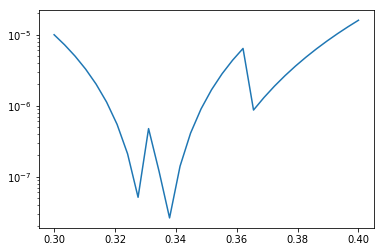

In [228]:
plt.plot(alphagrid,y)
plt.yscale('log')

# #Problem 7

In [285]:
def NewtonNCC(f, x0, der,maxiter):
    x_old=x0
    for it in range(maxiter):
        x_new=x_old-(f(x_old)/der(x_old))
        x_old=x_new
    return x_new

In [318]:
def attr(f,zeros,res,rmin, rmax, imin, imax, iter):
    size=len(str(zeros))
    Y=np.empty([size,size])
    #Initial grid of complex points: 
    x_real = np.linspace(rmin,rmax, res) # Real parts.
    x_imag = np.linspace(imin, imax, res) # Imaginary parts.
    X_real, X_imag = np.meshgrid(x_real, x_imag)
    X_0 = X_real + 1j*X_imag # Combine real and imaginary parts.
    Xk=NewtonNCC(f, X_0, der,iter)
    for i in range(1,size):
        for j in range(1,size):
            Y[i,j]=np.argmin(abs(Xk-zeros))
    return Y


In [319]:
def f(x):
    out=x**3-1
    return out

In [320]:
def der(x):
    out=3*x**2
    return out

In [321]:
zeros=np.array(1)
res=10
rmin=-1
rmax=1
imin=-1
imax=1
iter=20

In [322]:
attr(f,1,zeros,rmin, rmax, imin, imax, iter)

array([[4.]])

In [317]:
    plt.pcolormesh([x_real,x_real], Y)

NameError: name 'x_real' is not defined

# Numerical Integration


In [324]:
# 2.1, 2.2,2.3, 2.4, 3.1, 3.2, and 4.1